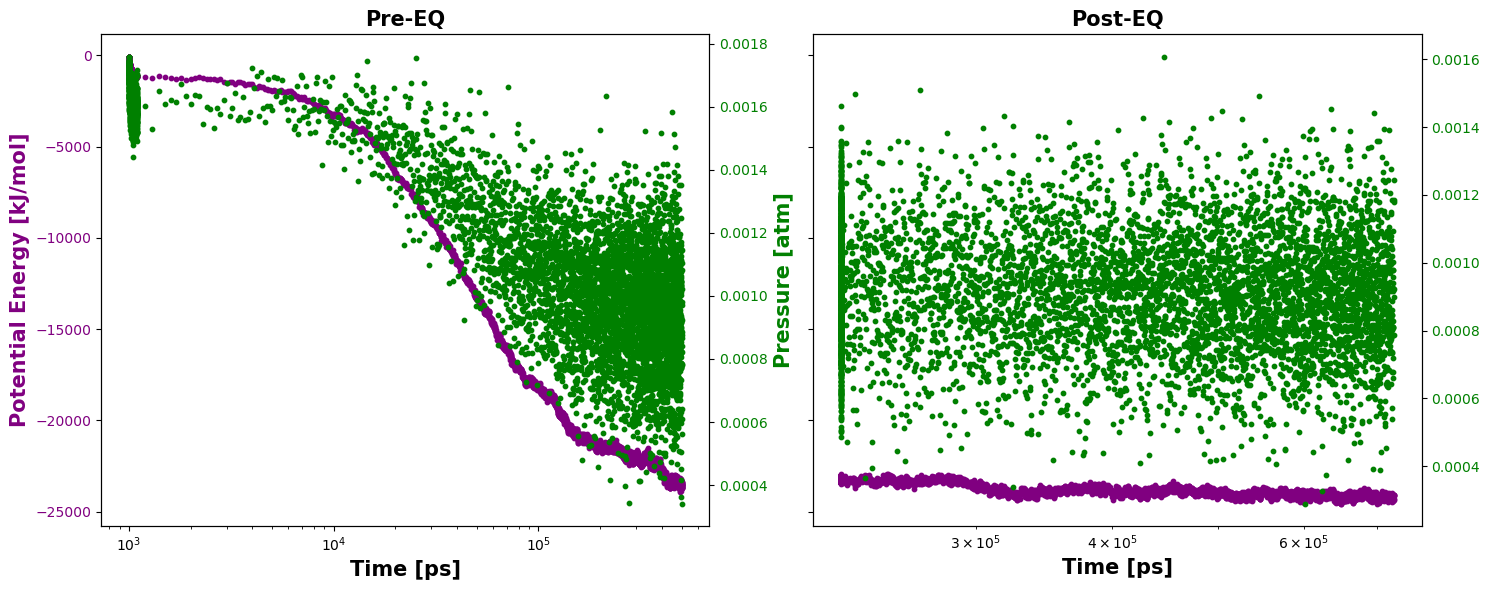

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Increase the font size and bold the text for titles and axis labels globally
plt.rcParams.update({
    'axes.titlesize': 15,  # Increase the font size of the title
    'axes.titleweight': 'bold',  # Bold the title font
    'axes.labelsize': 15,  # Increase the font size of the axis labels
    'axes.labelweight': 'bold',  # Bold the axis label font
    'grid.alpha': 0.5,  # Set grid line transparency
    'legend.fontsize': 12  # Set the legend font size
})

# Load the data from the provided files
energies_pre_eq = pd.read_csv('./Energies_trajectory_PreEQ.csv')
energies_post_eq = pd.read_csv('./Energies_trajectory_PostEQ.csv')
thermo_pre_eq = pd.read_csv('./ThermodynamicQuantities_trajectory_PreEQ.csv')
thermo_post_eq = pd.read_csv('./ThermodynamicQuantities_trajectory_PostEQ.csv')

# Subtract the last value of pre-EQ time from post-EQ time
time_shift = energies_pre_eq['Time [ps]'].iloc[-1]

energies_post_eq['Time [ps]'] -= time_shift
thermo_post_eq['Time [ps]'] -= time_shift

# Create a figure and axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Assign colors for energy and pressure plots
color_energy = 'purple'
color_pressure = 'green'

# Plotting pre-EQ data
ax1.scatter(energies_pre_eq['Time [ps]'], energies_pre_eq['Potential Energy [kJ/mol]'], color=color_energy, label='Potential Energy', s=10)
ax1.set_ylabel('Potential Energy [kJ/mol]', color=color_energy)
ax1.tick_params(axis='y', labelcolor=color_energy)
ax1.set_xlabel('Time [ps]')
ax1.set_xscale('log')

# Duplicate the x-axis for the second plot
ax2.scatter(energies_post_eq['Time [ps]'], energies_post_eq['Potential Energy [kJ/mol]'], color=color_energy, label='Potential Energy', s=10)
ax2.set_xlabel('Time [ps]')
ax2.set_xscale('log')

# Plotting the pressure data on the second y-axis
ax3 = ax1.twinx()
ax3.scatter(thermo_pre_eq['Time [ps]'], thermo_pre_eq['Pressure'], color=color_pressure, label='Pressure', s=10)
ax3.set_ylabel('Pressure [atm]', color=color_pressure)
ax3.tick_params(axis='y', labelcolor=color_pressure)

# Plotting the pressure data on the second y-axis for the second plot
ax4 = ax2.twinx()
ax4.scatter(thermo_post_eq['Time [ps]'], thermo_post_eq['Pressure'], color=color_pressure, label='Pressure', s=10)
ax4.tick_params(axis='y', labelcolor=color_pressure)

# Set titles for subplots
ax1.set_title('Pre-EQ')
ax2.set_title('Post-EQ')

# Move the legend to the bottom left of the left subplot
#legend = ax1.legend(loc='lower left', bbox_to_anchor=(0, 1))

plt.tight_layout()

# Save the figure as EQ_stats.svg
plt.savefig('EQ_stats.png')

plt.show()
